# Workbook Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter

In [2]:
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Data

The data is obtained from kaggle: https://www.kaggle.com/c/bluebook-for-bulldozers/data

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April  30, 2012.

* Test.csv is the test case and was released in the last week of the competition. It contains data from May 1, 2012 to November 2012.

# Data Preparation and Analysis

In [3]:
# Importing train and valid sets from csv file
df = pd.read_csv("data/TrainAndValid.csv", low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

[]

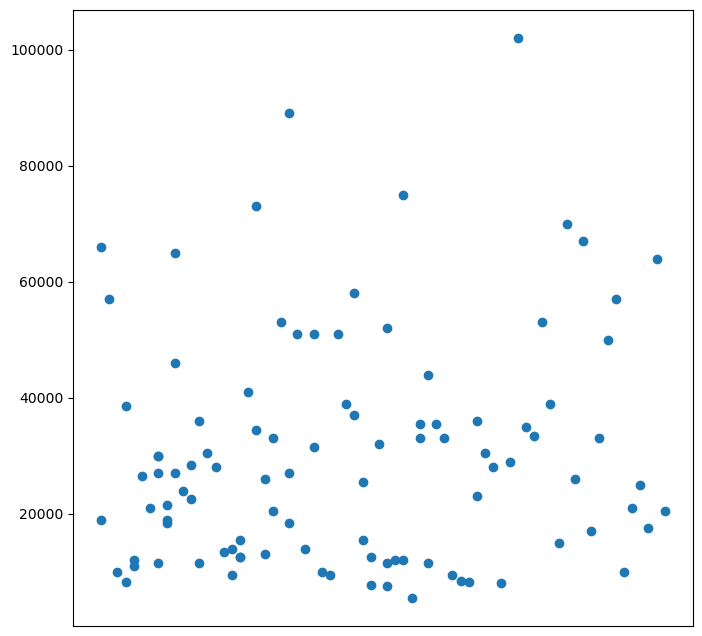

In [6]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df["saledate"][:100], df["SalePrice"][:100])
ax.set_xticks([])

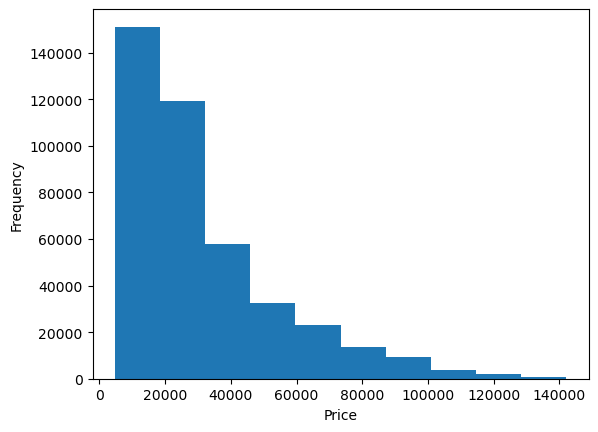

In [7]:
df.SalePrice.plot.hist(xlabel = "Price");

In [8]:
df['saledate'][:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

In [9]:
df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory = False,
                 parse_dates = ['saledate'])

In [10]:
df['saledate'][:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

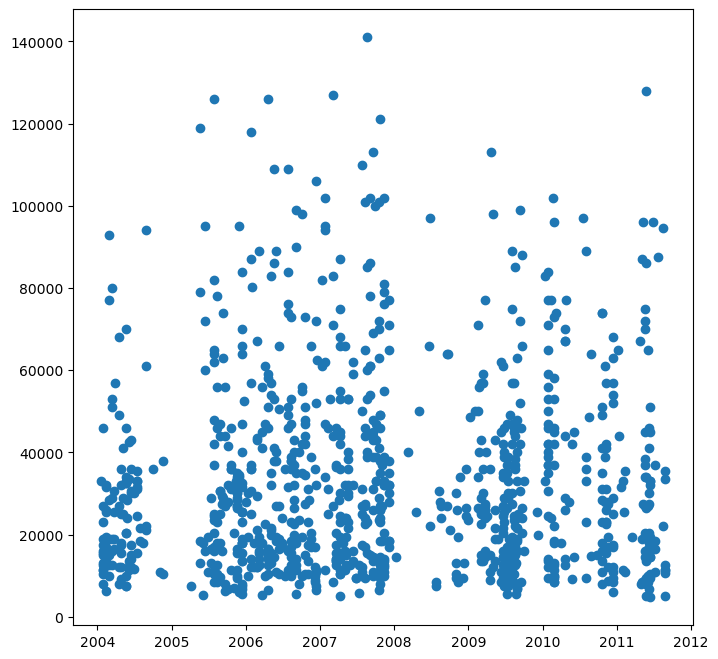

In [11]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [12]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [13]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [14]:
dfm = df.copy()

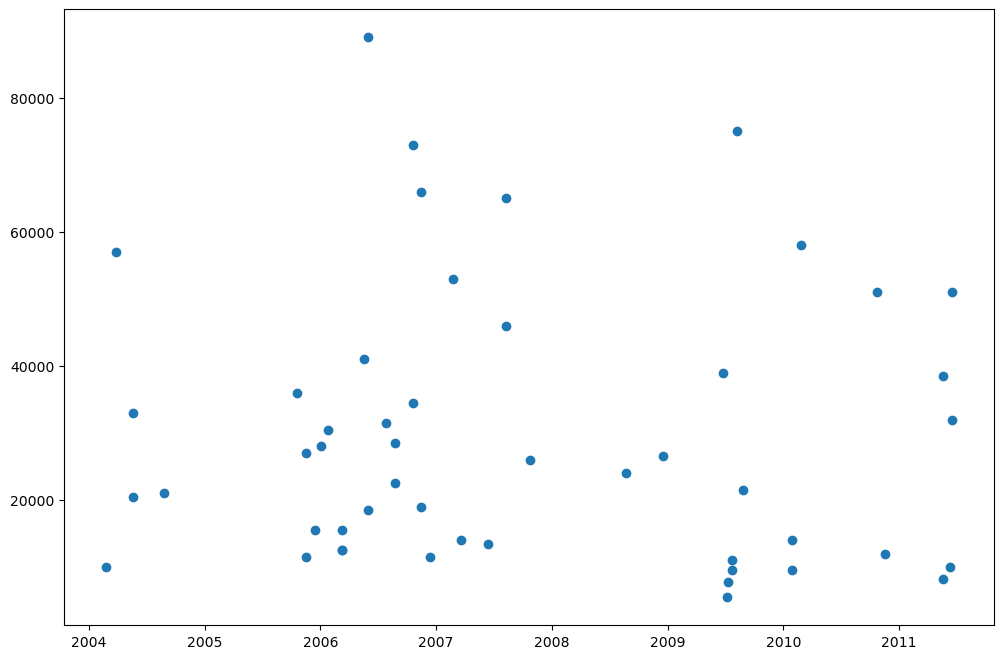

In [15]:
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(dfm['saledate'][:50], dfm['SalePrice'][:50]);

In [16]:
dfm['saleyear'] = dfm.saledate.dt.year
dfm['salemonth'] = dfm.saledate.dt.month
dfm['saleday'] = dfm.saledate.dt.day
dfm['saledayofweek'] = dfm.saledate.dt.dayofweek
dfm['saledayofyear'] = dfm.saledate.dt.dayofyear

In [17]:
dfm.tail().T

,412693,412694,412695,412696,412697
SalesID,6333344,6333345,6333347,6333348,6333349
SalePrice,10000.0,10500.0,12500.0,10000.0,13000.0
MachineID,1919201,1882122,1944213,1794518,1944743
ModelID,21435,21436,21435,21435,21436
datasource,149,149,149,149,149
auctioneerID,2.0,2.0,2.0,2.0,2.0
YearMade,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2012-03-07 00:00:00,2012-01-28 00:00:00,2012-01-28 00:00:00,2012-03-07 00:00:00,2012-01-28 00:00:00


In [18]:
dfm.drop('saledate', axis = 1, inplace = True)

In [19]:
dfm.tail().T

,412693,412694,412695,412696,412697
SalesID,6333344,6333345,6333347,6333348,6333349
SalePrice,10000.0,10500.0,12500.0,10000.0,13000.0
MachineID,1919201,1882122,1944213,1794518,1944743
ModelID,21435,21436,21435,21435,21436
datasource,149,149,149,149,149
auctioneerID,2.0,2.0,2.0,2.0,2.0
YearMade,2005,2005,2005,2006,2006
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,30NX,30NX2,30NX,30NX,30NX2


In [20]:
dfm.saleyear.value_counts()

saleyear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [21]:
dfm.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [22]:
for label, content in  dfm.items():
    if pd.api.types.is_any_real_numeric_dtype(content):
        print(f'{label} = numeric \n')
    else:
        print(f'{label} is not numeric \n')

SalesID = numeric 

SalePrice = numeric 

MachineID = numeric 

ModelID = numeric 

datasource = numeric 

auctioneerID = numeric 

YearMade = numeric 

MachineHoursCurrentMeter = numeric 

UsageBand is not numeric 

fiModelDesc is not numeric 

fiBaseModel is not numeric 

fiSecondaryDesc is not numeric 

fiModelSeries is not numeric 

fiModelDescriptor is not numeric 

ProductSize is not numeric 

fiProductClassDesc is not numeric 

state is not numeric 

ProductGroup is not numeric 

ProductGroupDesc is not numeric 

Drive_System is not numeric 

Enclosure is not numeric 

Forks is not numeric 

Pad_Type is not numeric 

Ride_Control is not numeric 

Stick is not numeric 

Transmission is not numeric 

Turbocharged is not numeric 

Blade_Extension is not numeric 

Blade_Width is not numeric 

Enclosure_Type is not numeric 

Engine_Horsepower is not numeric 

Hydraulics is not numeric 

Pushblock is not numeric 

Ripper is not numeric 

Scarifier is not numeric 

Tip_Control is not n

In [23]:
for label, content in dfm.items():
    if not pd.api.types.is_any_real_numeric_dtype(content):
        dfm[label] = content.astype("category").cat.as_ordered()

In [24]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [25]:
dfm.state.cat.codes

0          0
1         32
2         31
3         43
4         31
          ..
412693    43
412694     8
412695     8
412696    43
412697     8
Length: 412698, dtype: int8

In [26]:
dftrain = dfm[dfm.saleyear != 2012]
dfval = dfm[dfm.saleyear == 2012]

In [27]:
# Filling missing numeric data
for label, content in dftrain.items():
    if dftrain[label].isna().sum() != 0:
        if pd.api.types.is_numeric_dtype(content):
            print(label)
            dftrain[label+'_is_missing'] = pd.isnull(content)
            dftrain[label] = content.fillna(content.median())

auctioneerID
MachineHoursCurrentMeter


In [28]:
dfval['auctioneerID_is_missing'] = False * len(dfval)

In [29]:
for label, content in dfval.items():
    if dfval[label].isna().sum() != 0:
        if pd.api.types.is_numeric_dtype(content):
            print(label)
            dfval[label+'_is_missing'] = pd.isnull(content)
            dfval[label] = content.fillna(content.median())

MachineHoursCurrentMeter


In [30]:
for label, content in dfm.items():
    if not pd.api.types.is_any_real_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [31]:
pd.Categorical(dfm['UsageBand']).codes

array([ 1,  1,  0, ..., -1, -1, -1], dtype=int8)

In [32]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 0 to 401124
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              401125 non-null  int64   
 1   SalePrice                            401125 non-null  float64 
 2   MachineID                            401125 non-null  int64   
 3   ModelID                              401125 non-null  int64   
 4   datasource                           401125 non-null  int64   
 5   auctioneerID                         401125 non-null  float64 
 6   YearMade                             401125 non-null  int64   
 7   MachineHoursCurrentMeter             401125 non-null  float64 
 8   UsageBand                            69639 non-null   category
 9   fiModelDesc                          401125 non-null  category
 10  fiBaseModel                          401125 non-null  category
 11  fiSec

In [33]:
dfval.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11573 entries, 401125 to 412697
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   SalesID                              11573 non-null  int64   
 1   SalePrice                            11573 non-null  float64 
 2   MachineID                            11573 non-null  int64   
 3   ModelID                              11573 non-null  int64   
 4   datasource                           11573 non-null  int64   
 5   auctioneerID                         11573 non-null  float64 
 6   YearMade                             11573 non-null  int64   
 7   MachineHoursCurrentMeter             11573 non-null  float64 
 8   UsageBand                            4031 non-null   category
 9   fiModelDesc                          11573 non-null  category
 10  fiBaseModel                          11573 non-null  category
 11  fiSecondaryDes

In [34]:
dfval['auctioneerID_is_missing'] = False * len(dfval)

In [35]:
for label, content in dftrain.items():
    if not pd.api.types.is_numeric_dtype(content):
        dftrain[label+'_is_missing'] = pd.isnull(content)
        dftrain[label] = pd.Categorical(content).codes + 1

In [36]:
for label, content in dfval.items():
    if not pd.api.types.is_numeric_dtype(content):
        dfval[label+'_is_missing'] = pd.isnull(content)
        dfval[label] = pd.Categorical(content).codes + 1

In [37]:
dftrain.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    380989
True      20136
Name: count, dtype: int64

In [38]:
dfval.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
0    11573
Name: count, dtype: int64

In [39]:
dfval.MachineHoursCurrentMeter_is_missing.value_counts()

MachineHoursCurrentMeter_is_missing
True     6834
False    4739
Name: count, dtype: int64

In [40]:
dftrain.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [41]:
dfval.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [42]:
dftrain.head().T[:51]

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,2,2,1,1,3
fiModelDesc,963,1745,336,3716,4261


In [43]:
dftrain.head().T[52:]

,0,1,2,3,4
saleyear,2006,2004,2004,2011,2009
salemonth,11,3,2,5,7
saleday,16,26,26,19,23
saledayofweek,3,4,3,3,3
saledayofyear,320,86,57,139,204
auctioneerID_is_missing,False,False,False,False,False
MachineHoursCurrentMeter_is_missing,False,False,False,False,False
UsageBand_is_missing,False,False,False,False,False
fiModelDesc_is_missing,False,False,False,False,False
fiBaseModel_is_missing,False,False,False,False,False


In [44]:
dfval.head().T[:51]

,401125,401126,401127,401128,401129
SalesID,1222837,1222839,1222841,1222843,1222845
SalePrice,31000.0,54000.0,26500.0,10000.0,35000.0
MachineID,902859,1048320,999308,1062425,1032841
ModelID,1376,36526,4587,1954,4701
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,1000,2006,2000,1000,2002
MachineHoursCurrentMeter,0.0,4412.0,10127.0,4682.0,8150.0
UsageBand,0,3,3,2,3
fiModelDesc,683,4641,414,1653,989


In [45]:
dfval.head().T[52:]

,401125,401126,401127,401128,401129
saleyear,2012,2012,2012,2012,2012
salemonth,1,1,1,1,1
saleday,5,5,5,5,4
saledayofweek,3,3,3,3,2
saledayofyear,5,5,5,5,4
auctioneerID_is_missing,0,0,0,0,0
MachineHoursCurrentMeter_is_missing,False,False,False,False,False
UsageBand_is_missing,True,False,False,False,False
fiModelDesc_is_missing,False,False,False,False,False
fiBaseModel_is_missing,False,False,False,False,False


In [46]:
dftrain.saleyear.value_counts()

saleyear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [47]:
dfval.saleyear.value_counts()

saleyear
2012    11573
Name: count, dtype: int64

In [48]:
dfval.to_csv('data/filled_validation_set.csv', index = False)

In [49]:
dftrain.to_csv('data/filled_train_set.csv', index = False)